In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, Merge

from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Description of the data:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Functions to Note:
- LeakyRelu activation
- Embedding

In [8]:
LeakyReLU?

In [3]:
rides = pd.read_csv('hour.csv')
rides['time'] = pd.to_datetime(rides['dteday'])+pd.Series([pd.DateOffset(hours = a ) for a in rides.hr.tolist()])
rides.drop(['instant','yr','dteday','casual','registered', 'atemp'],1,inplace=True)
rides['t'] = rides.time.values.astype(float)
rides.head()

/Users/sachin/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,time,t
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16,2011-01-01 00:00:00,1.293840e+18
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40,2011-01-01 01:00:00,1.293844e+18
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32,2011-01-01 02:00:00,1.293847e+18
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13,2011-01-01 03:00:00,1.293851e+18
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1,2011-01-01 04:00:00,1.293854e+18


Plot data for the first 10 days:

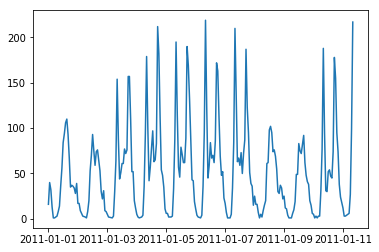

In [4]:
plt.plot(rides.time[:240],rides.cnt[:240])
plt.show()

In [4]:
quant_features = ['temp', 'hum', 'windspeed','t']
x_scaler = StandardScaler()
y_scaler = StandardScaler()
# TODO:
# standardise the quant features AND the y variable:
x_scaler.fit_transform?

rides.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,time,t
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16,2011-01-01 00:00:00,1.293840e+18
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40,2011-01-01 01:00:00,1.293844e+18
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32,2011-01-01 02:00:00,1.293847e+18
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13,2011-01-01 03:00:00,1.293851e+18
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1,2011-01-01 04:00:00,1.293854e+18


In [5]:
cat_features = ['season', 'hr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Preprocess data so that it starts from 0 and not 1
for feature in cat_features:
    if rides[feature].min() > 0:
        rides[feature] -= 1

In [ ]:
model = Sequential()
model.add(Dense(20,input_dim = 10,activation= 'relu'))

In [6]:
Embedding?

In [6]:
Flatten?

We will create the submodels for the categorical and quantitative models separately:

In [154]:
# Embed the models
cat_models = []
for feature in cat_features:
    # TODO: embed each categorical feature.
    # start each model with getting a Sequential class
    # Use nunique on the pandas dataframe to get unique values in each category
    # In embedding remember to set input_length = 1
    # Finally `Flatten()` the Embedding (to lose the time factor)
    model_cat = 
    
    cat_models.append(model_cat)
    
cat_model = Sequential()
cat_model.add(Merge(cat_models)) # Merge (and sum these models)

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [ ]:
Dense?

In [155]:
# Todo: Get a submodel for 
# Start a Sequential() class
# Add a fully connected hidden layer with a number of units of your choosing
# Add LeakyRelu() as the activation
quant_model = 

quant_model.add(LeakyReLU())

In [156]:
model = Sequential()
model.add(Merge([cat_model, quant_model], mode='concat')) # Concat the two seperate submodels into one
# Todo: Add any number of layers with activation function LeakyRelu() (similar to above)
model.compile(optimizer='adadelta', loss='mse')

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  from ipykernel import kernelapp as app


In [157]:
# Look at the number of parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_13 (Merge)             (None, 33)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 15)                510       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 15)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 1,128.0
Trainable params: 1,128.0
Non-trainable params: 0.0
_________________________________________________________________


In [158]:
# Save the last 21 days 
test_data = rides[-21*24:]
train_data = rides[:-21*24]

In [160]:
# Note: The way that the columns go into train/test x has to be the same as how it was defined in the model
train_x = [train_data[col].values for col in cat_features+[quant_features]]
test_x = [test_data[col].values for col in cat_features+[quant_features]]

# Train the model
model.fit(train_x, train_data['cnt'], batch_size=256)

Epoch 1/10
16875/16875 [==============================] - 0s - loss: 0.8576     
Epoch 2/10
16875/16875 [==============================] - 0s - loss: 0.5655     
Epoch 3/10
16875/16875 [==============================] - 0s - loss: 0.3414     
Epoch 4/10
16875/16875 [==============================] - 0s - loss: 0.2933     
Epoch 5/10
16875/16875 [==============================] - 0s - loss: 0.2790     
Epoch 6/10
16875/16875 [==============================] - 0s - loss: 0.2706     
Epoch 7/10
16875/16875 [==============================] - 0s - loss: 0.2644     
Epoch 8/10
16875/16875 [==============================] - 0s - loss: 0.2592     
Epoch 9/10
16875/16875 [==============================] - 0s - loss: 0.2557     
Epoch 10/10
16875/16875 [==============================] - 0s - loss: 0.2520     


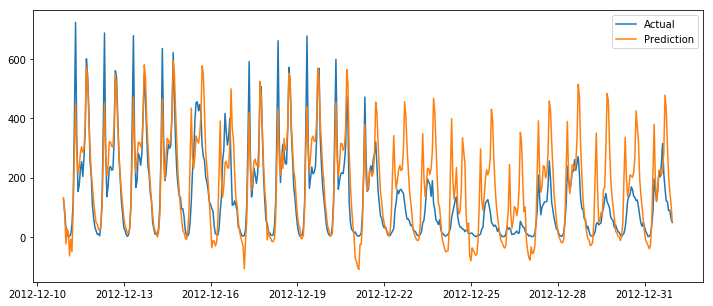

In [166]:
pred_y = model.predict(test_x, batch_size=256)
plt.figure(figsize=(12,5))
plt.plot(test_data.time, y_scaler.inverse_transform(test_data.cnt), label='Actual')
plt.plot(test_data.time, y_scaler.inverse_transform(pred_y), label='Prediction')
plt.legend()
plt.show()

Try and beat my score of 0.36

In [167]:
model.evaluate(test_x, test_data['cnt'], batch_size=256)

256/504 [==============>...............] - ETA: 0s

0.36286450851531254